# Purpose

Im interested in exploring the data we've collected about jobs a little further. 
- Statistics and histogram regarding the character length of the full posting description

In [3]:
import os
import sys
import logging
import pandas as pd
from dotenv import load_dotenv
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

# Instead of using __file__, use the current working directory
current_working_directory = os.getcwd()

# Assuming your structure requires going up one level for the parent directory:
parent_directory = os.path.dirname(current_working_directory)

# Add the parent directory to the sys.path:
if parent_directory not in sys.path:
    sys.path.append(parent_directory)

from CommonUtilities.OpenAICaller import OpenAICaller
from CommonUtilities.JobPostingDao import JobPostingDao

2024-02-22 07:49:21,351 - INFO - JobPostingDao class initialized


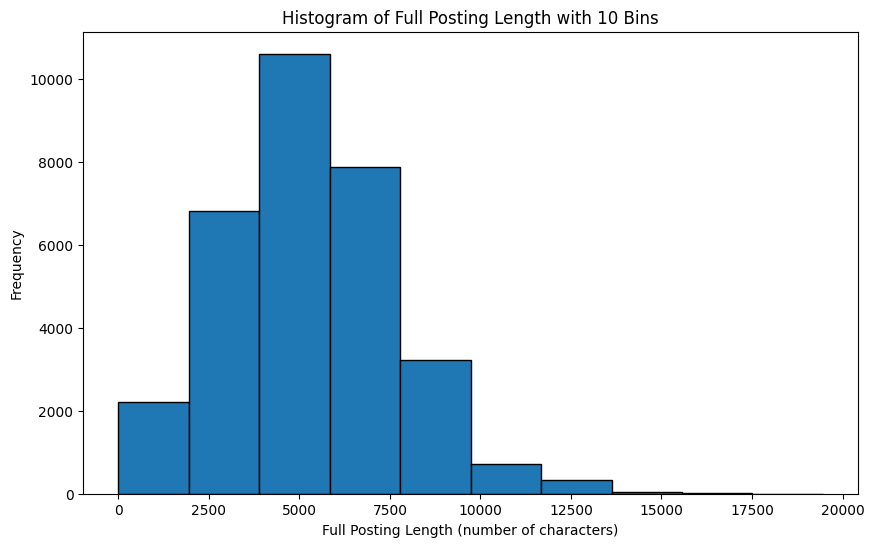

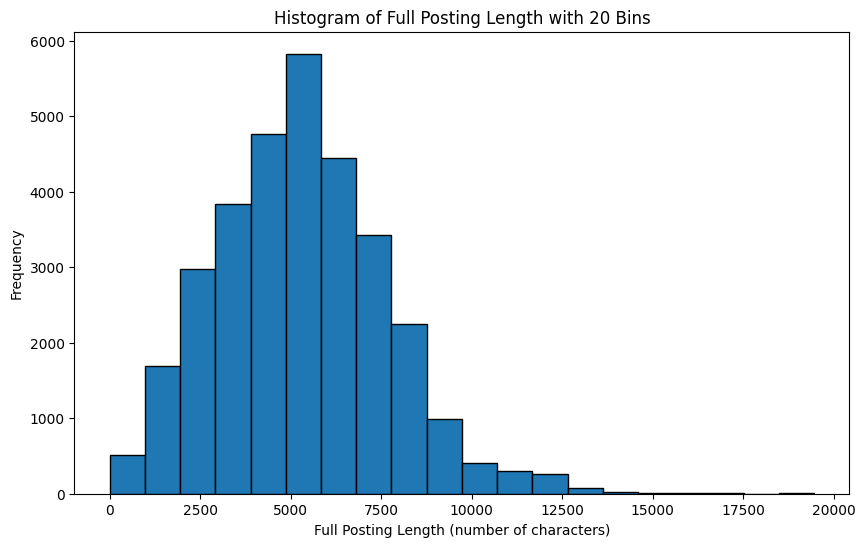

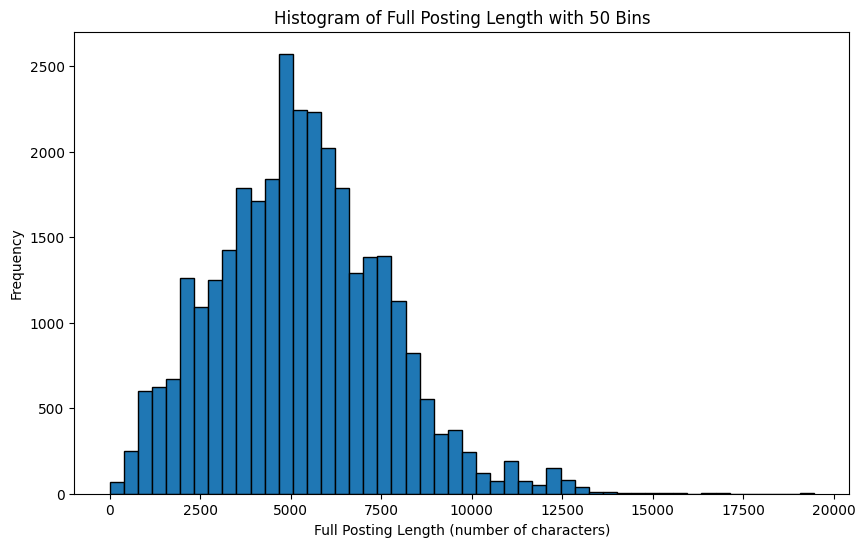

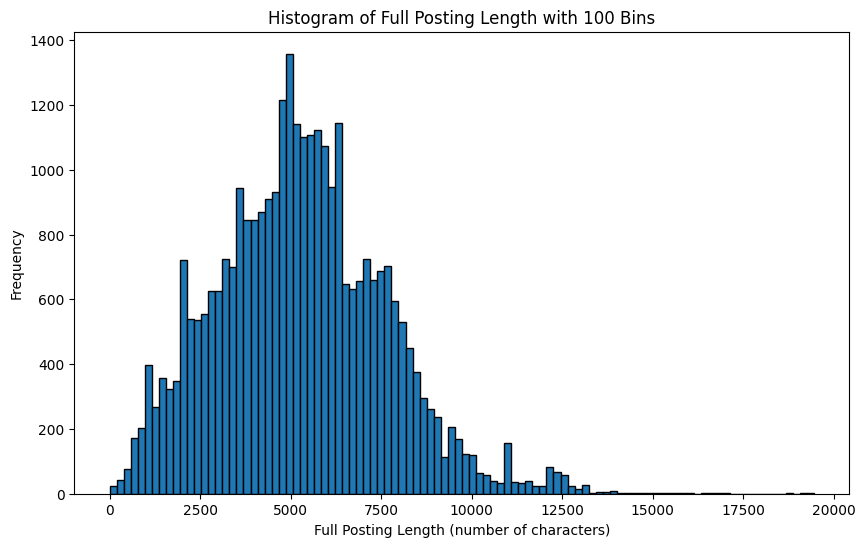

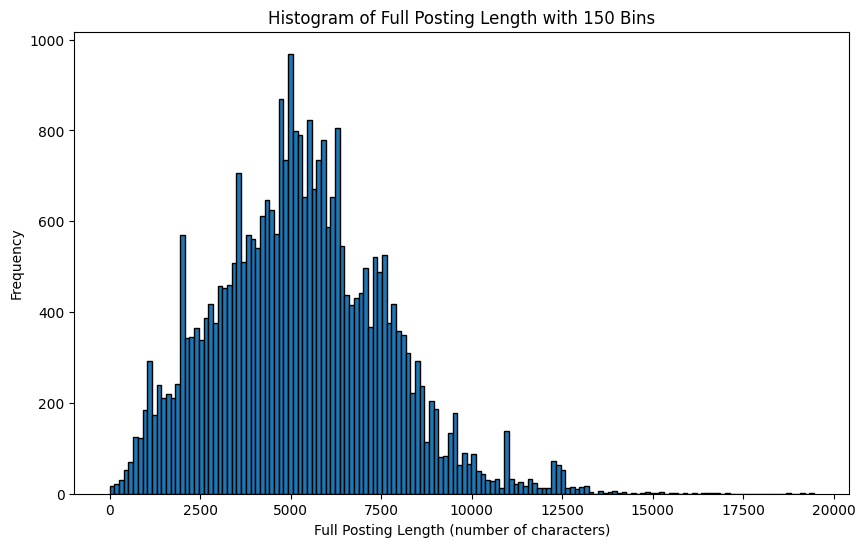

In [5]:
jobPostingDao = JobPostingDao()
allJobs = jobPostingDao.getAllJobs()

#Drop the unneded columns
allJobs.drop(columns=['salary_low', 'salary_midpoint', 'salary_high'], inplace=True)
allJobs.drop(columns=['posting_url', 'posting_source_id', 'posting_source', 'job_last_collected_date'], inplace=True)
allJobs.drop(columns=['job_posting_date', 'work_location_type', 'is_ai_justification', 'job_insertion_date'], inplace=True)

#Now add a new column to the allJobs Dataframe allJobs["full_posting_length"]
#We want to fill the new column with values. This will be the number of characters in the allJobs["full_posting_description"]
allJobs["full_posting_length"] = allJobs["full_posting_description"].apply(len)


#Now we want to display a histogram about the values in allJobs["full_posting_length"]. We want to create five charts. We want to play with different numbers of histogram bins Save all the charts in a PDF in this folder. PDF is called, full_posting_length.pdf
# Chart 1 = 10 Bins
# Chart 2 = 20 Bins
# Chart 3 = 50 Bins
# Chart 4 = 100 Bins
# Chart 5 = 150 Bins
pdf_pages = PdfPages('full_posting_length.pdf')
bins_list = [10, 20, 50, 100, 150]

for bins in bins_list:
    # Create a new figure and plot the histogram
    plt.figure(figsize=(10, 6))
    plt.hist(allJobs["full_posting_length"], bins=bins, edgecolor='k')
    plt.title(f'Histogram of Full Posting Length with {bins} Bins')
    plt.xlabel('Full Posting Length (number of characters)')
    plt.ylabel('Frequency')
    
    # Save the current figure to the PDF
    pdf_pages.savefig()
    
# Close the PDF file
pdf_pages.close()

